### Figure 5: Held-out evaluation: the previous best-performing model can be further improved when augmented with GloRE

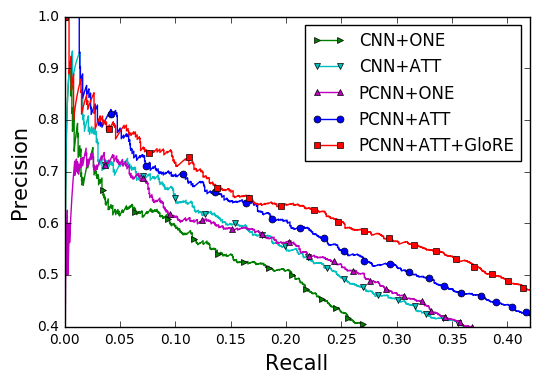

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

def getXY(file_name, n = 2000):
    x, y = [], []
    with open(file_name) as f:
        for i, line in enumerate(f):
            entries = line.split('\t')
            y.append(float(entries[0]))
            x.append(float(entries[1]))
            if i >= n:
                break
    return x, y

GloRE = 'results/held_out/PCNN+ATT+GloRE_pr.txt'
LoRE = 'results/held_out/PCNN+ATT+LoRE_pr.txt'
PCNN_ATT =  'results/held_out/PCNN+ATT_pr.txt'
PCNN_ONE =  'results/held_out/PCNN+ONE_pr.txt'
CNN_ATT =  'results/held_out/CNN+ATT_pr.txt'
CNN_ONE =  'results/held_out/CNN+ONE_pr.txt'

x1, y1 = getXY(CNN_ONE)
x2, y2 = getXY(CNN_ATT)
x3, y3 = getXY(PCNN_ONE)
x4, y4 = getXY(PCNN_ATT)
x5, y5 = getXY(GloRE)

plt.plot(x1,y1, marker = '>', markevery = 100, markersize = 5, color = 'g')
plt.plot(x2,y2, marker = 'v', markevery = 100, markersize = 5, color='c')
plt.plot(x3,y3, marker = '^', markevery = 100, markersize = 5, color='m')
plt.plot(x4,y4, marker = 'o', markevery = 100, markersize = 5, color='b')
plt.plot(x5,y5, marker = 's', markevery = 100, markersize = 5, color='r')
plt.legend(['CNN+ONE', 'CNN+ATT','PCNN+ONE','PCNN+ATT', 'PCNN+ATT+GloRE'])
plt.ylim([0.4, 1.0])
plt.xlim([0.0, 0.42])
plt.xlabel('Recall', fontsize=15)
plt.ylabel('Precision', fontsize=15)
plt.gca().tick_params(labelsize=10)
plt.show()

### Figure 6: Held-out evaluation: LoRE vs. GloRE.

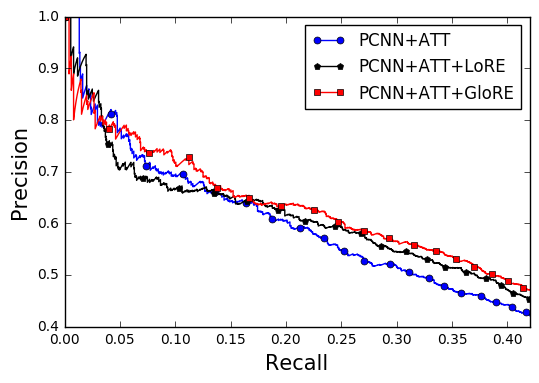

In [10]:
x1, y1 = getXY(PCNN_ATT)
x2, y2 = getXY(LoRE)
x3, y3 = getXY(GloRE)

plt.plot(x1,y1, marker = 'o', markevery = 100, markersize = 5, color='b')

plt.plot(x2,y2, marker = 'p', markevery = 100, markersize = 5, color='k')
plt.plot(x3,y3, marker = 's', markevery = 100, markersize = 5, color='r')
plt.legend(['PCNN+ATT', 'PCNN+ATT+LoRE', 'PCNN+ATT+GloRE'])
plt.ylim([0.4, 1.0])
plt.xlim([0.0, 0.42])
plt.xlabel('Recall', fontsize=15)
plt.ylabel('Precision', fontsize=15)
plt.gca().tick_params(labelsize=10)
plt.show()

### Table 2: Manual evaluation: false negatives from held-out evaluation are manually corrected by human experts

In [29]:
import os
def get_top_n_precision(file_name, every = 100, n = 1000):
    correct = 0.0
    print os.path.basename(file_name)
    header = ''
    values = ''
    with open(file_name) as f:
        for i, line in enumerate(f):
            if i >= n:
                break
            correct += int(line.split('\t')[0])
            if (i + 1) % every == 0:
                header += str(i + 1) + '\t'
                values += '{:.1f}\t'.format(correct / (i + 1) * 100)
    print header
    print values
                
GloRE = 'results/manual/PCNN+ATT+GloRE.txt'
LoRE = 'results/manual/PCNN+ATT+LoRE.txt'
PCNN_ATT = 'results/manual/PCNN+ATT.txt'

get_top_n_precision(PCNN_ATT, every = 100, n = 1000)
get_top_n_precision(LoRE, every = 100, n = 1000)
get_top_n_precision(GloRE, every = 100, n = 1000)

PCNN+ATT.txt
100	200	300	400	500	600	700	800	900	1000	
97.0	95.0	93.7	93.2	92.8	90.8	89.1	87.2	85.2	83.9	
PCNN+ATT+LoRE.txt
100	200	300	400	500	600	700	800	900	1000	
97.0	97.0	95.0	95.2	94.2	92.8	91.6	90.9	89.6	87.0	
PCNN+ATT+GloRE.txt
100	200	300	400	500	600	700	800	900	1000	
97.0	97.5	97.3	95.2	94.6	94.2	93.3	91.5	90.1	89.3	


### Added experiments: comparison between GloRE and a new method, PCNN+ATT+TM, from paper: Learning with Noise: Enhance Distantly Supervised Relation Extraction with Dynamic Transition Matrix, ACL 17

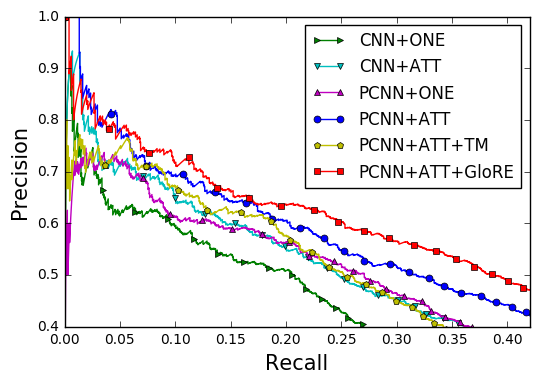

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

def getXY(file_name, n = 2000):
    x, y = [], []
    with open(file_name) as f:
        for i, line in enumerate(f):
            entries = line.split('\t')
            y.append(float(entries[0]))
            x.append(float(entries[1]))
            if i >= n:
                break
    return x, y

GloRE = 'results/held_out/PCNN+ATT+GloRE_pr.txt'
LoRE = 'results/held_out/PCNN+ATT+LoRE_pr.txt'
PCNN_ATT =  'results/held_out/PCNN+ATT_pr.txt'
PCNN_ONE =  'results/held_out/PCNN+ONE_pr.txt'
CNN_ATT =  'results/held_out/CNN+ATT_pr.txt'
CNN_ONE =  'results/held_out/CNN+ONE_pr.txt'
PCNN_ATT_TM =  'results/held_out/PCNN+ATT+TM_pr.txt'

x1, y1 = getXY(CNN_ONE)
x2, y2 = getXY(CNN_ATT)
x3, y3 = getXY(PCNN_ONE)
x4, y4 = getXY(PCNN_ATT)
x5, y5 = getXY(PCNN_ATT_TM)
x6, y6 = getXY(GloRE)

plt.plot(x1,y1, marker = '>', markevery = 100, markersize = 5, color = 'g')
plt.plot(x2,y2, marker = 'v', markevery = 100, markersize = 5, color='c')
plt.plot(x3,y3, marker = '^', markevery = 100, markersize = 5, color='m')
plt.plot(x4,y4, marker = 'o', markevery = 100, markersize = 5, color='b')
plt.plot(x5,y5, marker = 'p', markevery = 100, markersize = 5, color='y')
plt.plot(x6,y6, marker = 's', markevery = 100, markersize = 5, color='r')
plt.legend(['CNN+ONE', 'CNN+ATT','PCNN+ONE','PCNN+ATT', 'PCNN+ATT+TM', 'PCNN+ATT+GloRE'])
plt.ylim([0.4, 1.0])
plt.xlim([0.0, 0.42])
plt.xlabel('Recall', fontsize=15)
plt.ylabel('Precision', fontsize=15)
plt.gca().tick_params(labelsize=10)
#plt.savefig('pr_all.eps', format='eps')
plt.show()

### Added experiments: comparisons between different ensemble methods

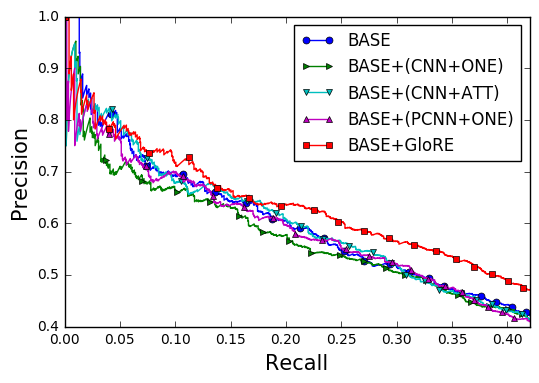

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

def getXY(file_name, n = 2000):
    x, y = [], []
    with open(file_name) as f:
        for i, line in enumerate(f):
            entries = line.split('\t')
            y.append(float(entries[0]))
            x.append(float(entries[1]))
            if i >= n:
                break
    return x, y

GloRE = 'results/held_out/PCNN+ATT+GloRE_pr.txt'
LoRE = 'results/held_out/PCNN+ATT+LoRE_pr.txt'
PCNN_ATT =  'results/held_out/PCNN+ATT_pr.txt'
PCNN_ONE =  'results/held_out/PCNN_ATT+PCNN_ONE_pr.txt'
CNN_ATT =  'results/held_out/PCNN_ATT+CNN_ATT_pr.txt'
CNN_ONE =  'results/held_out/PCNN_ATT+CNN_ONE_pr.txt'

x1, y1 = getXY(CNN_ONE)
x2, y2 = getXY(CNN_ATT)
x3, y3 = getXY(PCNN_ONE)
x4, y4 = getXY(PCNN_ATT)
x5, y5 = getXY(GloRE)

plt.plot(x4,y4, marker = 'o', markevery = 100, markersize = 5, color='b')
plt.plot(x1,y1, marker = '>', markevery = 100, markersize = 5, color = 'g')
plt.plot(x2,y2, marker = 'v', markevery = 100, markersize = 5, color='c')
plt.plot(x3,y3, marker = '^', markevery = 100, markersize = 5, color='m')
plt.plot(x5,y5, marker = 's', markevery = 100, markersize = 5, color='r')
plt.legend(['BASE','BASE+(CNN+ONE)', 'BASE+(CNN+ATT)','BASE+(PCNN+ONE)', 'BASE+GloRE'])
plt.ylim([0.4, 1.0])
plt.xlim([0.0, 0.42])
plt.xlabel('Recall', fontsize=15)
plt.ylabel('Precision', fontsize=15)
plt.gca().tick_params(labelsize=10)
#plt.savefig('ensemble.eps', format='eps')
plt.show()